# Kata 1: needle in a haystack

Another common use (some would say, the primary use) of STAC is to search for things.
Let's compare the performance of a bunch of different searches.

In [16]:
from pystac_client import Client

from labs_375 import STAC_FASTAPI_GEOPARQUET_URI, STAC_FASTAPI_PGSTAC_URI, Timer

LONGMONT = {"type": "Point", "coordinates": [-105.1019, 40.1672]}

geoparquet_client = Client.open(STAC_FASTAPI_GEOPARQUET_URI)
pgstac_client = Client.open(STAC_FASTAPI_PGSTAC_URI)

geoparquet_results = []
pgstac_results = []

with Timer() as timer:
    items = list(
        geoparquet_client.search(
            collections=["naip"], intersects=LONGMONT
        ).items_as_dicts()
    )
    geoparquet_results.append(timer.report(items))

with Timer() as timer:
    items = list(
        pgstac_client.search(collections=["naip"], intersects=LONGMONT).items_as_dicts()
    )
    pgstac_results.append(timer.report(items))


Retrieved 1 in 0.67s (1.50 items/s)
Retrieved 1 in 0.08s (11.95 items/s)


Intersects is pretty slow, let's see how we do on `id`.
We'll first do a full scan to get the first and last IDs.

In [17]:
items = list(
    geoparquet_client.search(
        collections=["naip"], max_items=10000, limit=10000
    ).items_as_dicts()
)
first_id = items[0]["id"]
last_id = items[-1]["id"]

with Timer() as timer:
    items = list(
        geoparquet_client.search(collections=["naip"], ids=[first_id]).items_as_dicts()
    )
    geoparquet_results.append(timer.report(items))

with Timer() as timer:
    items = list(
        geoparquet_client.search(collections=["naip"], ids=[last_id]).items_as_dicts()
    )
    timer.report(items)

with Timer() as timer:
    items = list(
        pgstac_client.search(collections=["naip"], ids=[first_id]).items_as_dicts()
    )
    pgstac_results.append(timer.report(items))

with Timer() as timer:
    items = list(
        pgstac_client.search(collections=["naip"], ids=[last_id]).items_as_dicts()
    )
    timer.report(items)

Retrieved 1 in 0.34s (2.90 items/s)
Retrieved 1 in 0.24s (4.10 items/s)
Retrieved 1 in 0.09s (11.26 items/s)
Retrieved 1 in 0.08s (13.29 items/s)


Ok, not as good as **pgstac** but not terrible.
Let's try a cql2 filter.

In [18]:
# from cql2 import Expr

# expr = Expr("naip:year = '2022'").to_json()
# with Timer() as timer:
#     items = list(
#         geoparquet_client.search(
#             collections=["naip"], filter=expr
#         ).items_as_dicts()
#     )
#     geoparquet_results.append(timer.report(items))

# with Timer() as timer:
#     items = list(
#         pgstac_client.search(
#             collections=["naip"], filter=expr
#         ).items_as_dicts()
#     )
#     pgstac_results.append(timer.report(items))


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

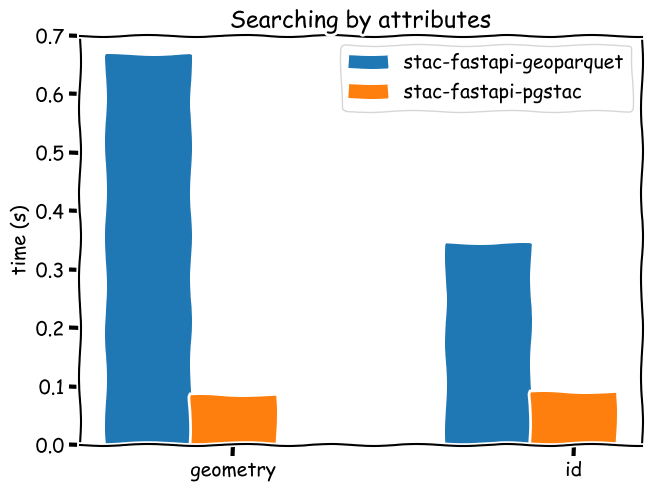

In [22]:
from matplotlib import pyplot
import numpy

x = numpy.arange(2)
width = 0.25
with pyplot.xkcd():
    fix, ax = pyplot.subplots(layout="constrained")

    ax.bar(x, geoparquet_results, width, label="stac-fastapi-geoparquet")
    ax.bar(x + width, pgstac_results, width, label="stac-fastapi-pgstac")
    ax.set_title("Searching by attributes")
    ax.set_ylabel("time (s)")
    ax.set_xticks(x + width, ["geometry", "id"])
    ax.legend()
    pyplot.show()